In [1]:
from re import L
import pandas as pd
import datetime as dt
import datetime
from datetime import timedelta,timezone
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from cassandra.query import dict_factory

pd.set_option('display.max_rows', 100)



In [2]:
#############################################################
#From route30_eta

auth_provider = PlainTextAuthProvider(username='cassandra', password='cassandra')
cluster = Cluster(contact_points=['158.132.175.131'], port='9042',
    auth_provider=auth_provider)

session = cluster.connect('hki_gmb')
session.row_factory = dict_factory

def convert_timezone(timestamp):
    return timestamp.tz_localize(tz = 'UTC').tz_convert(tz ='Asia/Hong_Kong')

# The function query the eta data and return a dataframe

def select_data(gen_date,route_id,route_seq,stop):


    sql_query = "SELECT * FROM hki_gmb.route30_eta_data where route_id = {} and gen_date = '{}' and route_seq = {} and stop_seq = {} and fetch_moment >= '{} 06:00:00+0800' and fetch_moment < '{} 23:59:59+0800' ;".format(route_id, gen_date,route_seq,stop,gen_date,gen_date)



    dictionary ={ "fetch_moment":[], "eta_1_diff":[], "eta_1_time":[],"eta_1_remark":[], "eta_2_diff":[], "eta_2_time":[],"eta_2_remark":[], "eta_3_diff":[], "eta_3_time":[],"eta_3_remark":[],"gen_time":[]}
    # "route_id" :[], "route_seq" :[], "stop_seq":[],



    for row in session.execute(sql_query):

        dictionary["fetch_moment"].append(row['fetch_moment'])
        dictionary["eta_1_diff"].append(row['eta_1_diff'])
        dictionary["eta_1_time"].append(row['eta_1_time'])
        dictionary["eta_1_remark"].append(row['eta_1_remark'])
        dictionary["eta_2_diff"].append(row['eta_2_diff'])
        dictionary["eta_2_time"].append(row['eta_2_time'])
        dictionary["eta_2_remark"].append(row['eta_2_remark'])
        dictionary["eta_3_diff"].append(row['eta_3_diff'])
        dictionary["eta_3_time"].append(row['eta_3_time'])
        dictionary["eta_3_remark"].append(row['eta_3_remark'])
        dictionary["gen_time"].append(row['gen_time'])

    df = pd.DataFrame(dictionary)


    df['fetch_moment'] = df['fetch_moment'].apply(convert_timezone)
    df['eta_1_time'] = df['eta_1_time'].apply(convert_timezone)
    df['eta_2_time'] = df['eta_2_time'].apply(convert_timezone)
    df['eta_3_time'] = df['eta_3_time'].apply(convert_timezone)
    df['gen_time'] = df['gen_time'].apply(convert_timezone)

    return df


In [3]:
##############################################################################################33
# from main eta



def convert_timezone(timestamp):
    return timestamp.tz_localize(tz = 'UTC').tz_convert(tz ='Asia/Hong_Kong')

# The function query the eta data and return a dataframe

def select_data(gen_date,route_id,route_seq,stop):
    
    
    
    auth_provider = PlainTextAuthProvider(username='cassandra', password='cassandra')
    cluster = Cluster(contact_points=['158.132.175.131'], port='9042',
    auth_provider=auth_provider)

    session = cluster.connect('hki_gmb')
    session.row_factory = dict_factory

    # sql_query = "SELECT * FROM hki_gmb.eta_data where route_id = {} and gen_date = '{}' and route_seq = {} and stop_seq = {} and fetch_moment >= '{}+0800' and gen_time <= fetch_monent  limit 40;".format(route_id,gen_date,route_seq,stop_seq, now_time )
    # sql_query = "SELECT * FROM hki_gmb.eta_data where route_id = {} and gen_date = '{}' and route_seq = {} and stop_seq = {} and fetch_moment >= '{}+0800' ;".format(route_id,gen_date,route_seq,stop_seq, now_time )
    
    # sql_query = "SELECT * FROM hki_gmb.eta_data where route_id = 2003472 and gen_date = '{}' and route_seq = 1 and stop_seq = {} and fetch_moment >= '{} 16:00:00+0800' and fetch_moment <= '{} 17:00+0800' ;".format(gen_date,stop,gen_date,gen_date)
    
    
    sql_query = "SELECT * FROM hki_gmb.eta_data where route_id = {} and gen_date = '{}' and route_seq = {} and stop_seq = {} and fetch_moment >= '{} 06:00:00+0800' and fetch_moment < '{} 23:59:59+0800' ;".format(route_id, gen_date,route_seq,stop,gen_date,gen_date)
    #sql_query = "SELECT * FROM hki_gmb.eta_data where route_id = {} and gen_date = '{}' and route_seq = {} and stop_seq = {}  ;".format(route_id, gen_date,route_seq,stop)

    #sql_query = "SELECT * FROM hki_gmb.eta_data where route_id = 2003472 and gen_date = '{}' and route_seq = 1 and stop_seq = {} ;".format(gen_date,stop)


    # .format(route_id,gen_date,route_seq,stop_seq, now_time )
    # sql_query = "SELECT * FROM hki_gmb.eta_data where route_id = {} and gen_date = '2022-08-10' and route_seq = {} and stop_seq = {}  ;".format(route_id,route_seq,stop_seq, now_time )


    # sql_query = "SELECT * FROM hki_gmb.eta_data where route_id = {} and gen_date = '{}' and route_seq = {} and stop_seq = {} ;".format(route_id,gen_date,route_seq,stop_seq)




    dictionary ={ "fetch_moment":[], "eta_1_diff":[], "eta_1_time":[],"eta_1_remark":[], "eta_2_diff":[], "eta_2_time":[],"eta_2_remark":[], "eta_3_diff":[], "eta_3_time":[],"eta_3_remark":[],"gen_time":[]}
    # "route_id" :[], "route_seq" :[], "stop_seq":[],



    for row in session.execute(sql_query):

        dictionary["fetch_moment"].append(row['fetch_moment'])
        dictionary["eta_1_diff"].append(row['eta_1_diff'])
        dictionary["eta_1_time"].append(row['eta_1_time'])
        dictionary["eta_1_remark"].append(row['eta_1_remark'])
        dictionary["eta_2_diff"].append(row['eta_2_diff'])
        dictionary["eta_2_time"].append(row['eta_2_time'])
        dictionary["eta_2_remark"].append(row['eta_2_remark'])
        dictionary["eta_3_diff"].append(row['eta_3_diff'])
        dictionary["eta_3_time"].append(row['eta_3_time'])
        dictionary["eta_3_remark"].append(row['eta_3_remark'])
        dictionary["gen_time"].append(row['gen_time'])

    df = pd.DataFrame(dictionary)


    df['fetch_moment'] = df['fetch_moment'].apply(convert_timezone)
    df['eta_1_time'] = df['eta_1_time'].apply(convert_timezone)
    df['eta_2_time'] = df['eta_2_time'].apply(convert_timezone)
    df['eta_3_time'] = df['eta_3_time'].apply(convert_timezone)
    df['gen_time'] = df['gen_time'].apply(convert_timezone)

    return df


In [4]:
def check_day(timedelta_obj):
    return timedelta_obj.days

def timestamp_to_sec(timedetla_obj):
    return timedetla_obj.total_seconds()

In [5]:
def get_minute_from_timestamp(timestamp_obj):
    return timestamp_obj.minute

def get_hour_from_timestamp(timestamp_obj):
    return timestamp_obj.hour

def get_quarter_from_timestamp(timestamp_obj):
    if 0 <= timestamp_obj.minute < 15:
        return 1
    
    elif 15 <= timestamp_obj.minute < 30:
        return 2
    
    elif 30 <= timestamp_obj.minute < 45:
        return 3
    
    elif 45 <= timestamp_obj.minute < 60:
        return 4

def get_half_hour_from_timestamp(timestamp_obj):
    if 0 <= timestamp_obj.minute < 30:
        return 1
    
    elif 30 <= timestamp_obj.minute < 60:
        return 2


In [6]:
# convert map infomation

GMB_route_map = pd.read_excel('./geo_route_table/geo_route_30_1.xlsx',header=0)
GMB_route_map_length = (GMB_route_map.groupby(['stop_range']).sum()['Shape_Length']*100000)
GMB_route_map_length

stop_range
1    296.268940
2    730.956296
3    153.426923
4    169.584868
5    474.034992
Name: Shape_Length, dtype: float64

In [7]:
# This function query the stop no. on given date and return a list 

def get_stops_list(route_id,route_seq,gen_date):
    auth_provider = PlainTextAuthProvider(username='cassandra', password='cassandra')
    cluster = Cluster(contact_points=['158.132.175.131'], port='9042',
        auth_provider=auth_provider)

    session = cluster.connect('hki_gmb')
    session.row_factory = dict_factory
    
    
    
    sql_query = "SELECT stops from hki_gmb.routeid_routeno_relationship WHERE route_id = {} and route_seq = {} and gen_date = '{}' ;".format(route_id,route_seq, gen_date)

    return session.execute(sql_query).one()['stops']
        

In [8]:

# # This function generates smoothed eta by time dataframe, estimated travel time (by hours) dataframe and estimated travel speed (by hours)

# def get_travel_speed(route_id,route_seq,gen_date):
    
#     # get stop num info for the route  
#     stops = get_stops_list (route_id,route_seq,gen_date)
    
#     # get the 
    
#     temp_eta ={}
#     temp_eta_smoothing = {} 
    
#     for stop in stops :
#         temp_eta["stop{}".format(stop)] = select_data(gen_date,route_id,route_seq,stop)
#         temp_eta["stop{}".format(stop)]['minute'] = temp_eta["stop{}".format(stop)]['fetch_moment'].apply(get_minute_from_timestamp)
#         temp_eta["stop{}".format(stop)]['hour'] = temp_eta["stop{}".format(stop)]['fetch_moment'].apply(get_hour_from_timestamp)
        
#         temp_eta_smoothing["stop{}".format(stop)] = temp_eta["stop{}".format(stop)].groupby(['hour','minute'])['eta_1_time'].mean()
        
     
#     eta1_smoothing_df = pd.DataFrame(temp_eta_smoothing)
    
#     temp_est_travel_time__byhour = {}
    
#     for stop in stops[:-1]:
#         temp_est_travel_time__byhour["stop{}".format(stop)] = (eta1_smoothing_df["stop{}".format(int(stop)+1)] - eta1_smoothing_df["stop{}".format(stop)])[(eta1_smoothing_df["stop{}".format(int(stop)+1)] - eta1_smoothing_df["stop{}".format(stop)]).apply(check_day) ==0].groupby('hour').mean().apply(timestamp_to_sec)
        
#     est_travel_time__byhour_df  = pd.DataFrame(temp_est_travel_time__byhour)
    
#     temp_est_travel_speed__byhour = {}
    
#     GMB_route_map = pd.read_excel('MB_30_HV.xls',header=0)
#     GMB_route_map_length = (GMB_route_map.groupby(['stop_range']).sum()['Shape_Length']*100000)
#     GMB_route_map_length
    
    
#     for stop in stops[:-1]:
#         temp_est_travel_speed__byhour["stop{}".format(stop)] = GMB_route_map_length[int(stop)]/est_travel_time__byhour_df["stop{}".format(stop)]
        
#     est_travel_speed__byhour_df  = pd.DataFrame(temp_est_travel_speed__byhour)

#     return eta1_smoothing_df, est_travel_time__byhour_df , est_travel_speed__byhour_df


In [9]:
def get_travel_speed(route_id,route_seq,gen_date):
    
    # get stop num info for the route  
    stops = get_stops_list (route_id,route_seq,gen_date)
    
    # read data from database and transfer to dataframe
    
    temp_eta ={}
    temp_eta_smoothing = {} 
    
    for stop in stops :
        temp_eta["stop{}".format(stop)] = select_data(gen_date,route_id,route_seq,stop)
        temp_eta["stop{}".format(stop)]['minute'] = temp_eta["stop{}".format(stop)]['fetch_moment'].apply(get_minute_from_timestamp)
        temp_eta["stop{}".format(stop)]['hour'] = temp_eta["stop{}".format(stop)]['fetch_moment'].apply(get_hour_from_timestamp)
        temp_eta["stop{}".format(stop)]['quarter'] = temp_eta["stop{}".format(stop)]['fetch_moment'].apply(get_quarter_from_timestamp)
        temp_eta["stop{}".format(stop)]['half_hour'] = temp_eta["stop{}".format(stop)]['fetch_moment'].apply(get_half_hour_from_timestamp)

        temp_eta_smoothing["stop{}".format(stop)] = temp_eta["stop{}".format(stop)].groupby(['hour','half_hour','quarter','minute',])['eta_1_time'].mean()
        
      
    eta1_smoothing_df = pd.DataFrame(temp_eta_smoothing)

#     GMB_route_map = pd.read_excel('MB_30_HV.xls',header=0)
    GMB_route_map = pd.read_excel('./geo_route_table/geo_route_{}_{}.xlsx'.format(get_routeno_by_routeid(route_id,route_seq,gen_date),route_seq),header=0)

    GMB_route_map_length = (GMB_route_map.groupby(['stop_range']).sum()['Shape_Length']*100000)
    GMB_route_map_length
    
    
    # Generate travel time and speed by hours

    temp_est_travel_time__byhour = {}
    
    for stop in stops[:-1]:
        temp_est_travel_time__byhour["stop{}".format(stop)] = (eta1_smoothing_df["stop{}".format(int(stop)+1)] - eta1_smoothing_df["stop{}".format(stop)])[(eta1_smoothing_df["stop{}".format(int(stop)+1)] - eta1_smoothing_df["stop{}".format(stop)]).apply(check_day) ==0].groupby('hour').mean().apply(timestamp_to_sec)
        
    est_travel_time__byhour_df  = pd.DataFrame(temp_est_travel_time__byhour)
 
    temp_est_travel_speed__byhour = {}
    
    for stop in stops[:-1]:
        temp_est_travel_speed__byhour["stop{}".format(stop)] = GMB_route_map_length[int(stop)]/est_travel_time__byhour_df["stop{}".format(stop)]
        
    est_travel_speed__byhour_df  = pd.DataFrame(temp_est_travel_speed__byhour)
    
    # Generate travel time and speed by hours and quarter
    
    temp_est_travel_time__byquarter = {}
    
    for stop in stops[:-1]:
        temp_est_travel_time__byquarter["stop{}".format(stop)] = (eta1_smoothing_df["stop{}".format(int(stop)+1)] - eta1_smoothing_df["stop{}".format(stop)])[(eta1_smoothing_df["stop{}".format(int(stop)+1)] - eta1_smoothing_df["stop{}".format(stop)]).apply(check_day) ==0].groupby(['hour','quarter']).mean().apply(timestamp_to_sec)
        
    est_travel_time__byquarter_df  = pd.DataFrame(temp_est_travel_time__byquarter)
    

    temp_est_travel_speed__byquarter = {}

    for stop in stops[:-1]:
        temp_est_travel_speed__byquarter["stop{}".format(stop)] = GMB_route_map_length[int(stop)]/est_travel_time__byquarter_df["stop{}".format(stop)]
        
    est_travel_speed__byquarter_df  = pd.DataFrame(temp_est_travel_speed__byquarter)
    
    
    
    # Generate travel time and speed by half hours 
    
    temp_est_travel_time__byhalf_hour = {}
    
    for stop in stops[:-1]:
        temp_est_travel_time__byhalf_hour["stop{}".format(stop)] = (eta1_smoothing_df["stop{}".format(int(stop)+1)] - eta1_smoothing_df["stop{}".format(stop)])[(eta1_smoothing_df["stop{}".format(int(stop)+1)] - eta1_smoothing_df["stop{}".format(stop)]).apply(check_day) ==0].groupby(['hour','half_hour']).mean().apply(timestamp_to_sec)
        
    est_travel_time__byhalf_hour_df  = pd.DataFrame(temp_est_travel_time__byhalf_hour)
    

    temp_est_travel_speed__byhalf_hour = {}

    for stop in stops[:-1]:
        temp_est_travel_speed__byhalf_hour["stop{}".format(stop)] = GMB_route_map_length[int(stop)]/est_travel_time__byhalf_hour_df["stop{}".format(stop)]
        
    est_travel_speed__byhalf_hour_df  = pd.DataFrame(temp_est_travel_speed__byhalf_hour)
    

    
    

    return eta1_smoothing_df, est_travel_time__byhour_df , est_travel_speed__byhour_df , est_travel_time__byquarter_df , est_travel_speed__byquarter_df,est_travel_time__byhalf_hour_df , est_travel_speed__byhalf_hour_df



In [10]:
# def get_routeno_by_routeid
query = "select route_no from routeid_routeno_relationship where route_id = {} and route_seq = {} and gen_date = '{}';".format(2006408,1,"2022-09-28")
a = session.execute(query).one()
a

{'route_no': '1'}

In [11]:
def get_routeno_by_routeid(route_id,route_seq,gen_date):
    query = "select route_no from routeid_routeno_relationship where route_id = {} and route_seq = {} and gen_date = '{}';".format(route_id,route_seq,gen_date)
    return session.execute(query).one()['route_no']

In [12]:
route30_seq1_21 = get_travel_speed(2003472,1,'2022-09-21')
# route30_seq1_22 = get_travel_speed(2003472,1,'2022-09-22')
# route30_seq1_23 = get_travel_speed(2003472,1,'2022-09-23')
# route30_seq1_24 = get_travel_speed(2003472,1,'2022-09-24')
# route30_seq1_25 = get_travel_speed(2003472,1,'2022-09-25')
# route30_seq1_26 = get_travel_speed(2003472,1,'2022-09-26')

In [13]:
pd.set_option('display.max_rows', 200)
(route30_seq1_21[0]['stop2'] - route30_seq1_21[0]['stop1']).head(200)

hour  half_hour  quarter  minute
6     1          1        0          0 days 00:00:37.174000128
                          1          0 days 00:00:37.174000128
                          2          0 days 00:00:37.174000128
                          3          0 days 00:00:37.174000128
                          4          0 days 00:00:37.174000128
                          5          0 days 00:00:37.174000128
                          6          0 days 00:00:37.174000128
                          7          0 days 00:00:37.174000128
                          8          0 days 00:00:37.174000128
                          9          0 days 00:00:37.174000128
                          10         0 days 00:00:37.174000128
                          11         0 days 00:01:01.029499904
                          12         0 days 00:01:24.884999936
                          13         0 days 00:01:24.884999936
                          14         0 days 00:01:24.884999936
                 2    

In [14]:
#smoothing time by min 
route30_seq1_21[0].head(100)

stop1  \
hour half_hour quarter minute                                       
6    1         1       0                2022-09-21 06:30:00+08:00   
                       1                2022-09-21 06:30:00+08:00   
                       2                2022-09-21 06:30:00+08:00   
                       3                2022-09-21 06:30:00+08:00   
                       4                2022-09-21 06:30:00+08:00   
                       5                2022-09-21 06:30:00+08:00   
                       6                2022-09-21 06:30:00+08:00   
                       7                2022-09-21 06:30:00+08:00   
                       8                2022-09-21 06:30:00+08:00   
                       9                2022-09-21 06:30:00+08:00   
                       10               2022-09-21 06:30:00+08:00   
                       11               2022-09-21 06:30:00+08:00   
                       12               2022-09-21 06:30:00+08:00   
                       13               2022-09-21 06:30:00+08:00   
                       14               2022-09-21 06:30:00+08:00   
               2       15               2022-09-21 06:30:00+08:00   
                       16               2022-09-21 06:30:00+08:00   
                       17               2022-09-21 06:30:00+08:00   
                       18               2022-09-21 06:30:00+08:00   
                       19               2022-09-21 06:30:00+08:00   
                       20               2022-09-21 06:30:00+08:00   
                       21               2022-09-21 06:30:00+08:00   
                       22               2022-09-21 06:30:00+08:00   
                       23               2022-09-21 06:30:00+08:00   
                       24               2022-09-21 06:30:00+08:00   
                       25               2022-09-21 06:30:00+08:00   
                       26               2022-09-21 06:30:00+08:00   
                       27               2022-09-21 06:34:00+08:00   
                       28               2022-09-21 06:38:00+08:00   
                       29               2022-09-21 06:38:00+08:00   
     2         3       30               2022-09-21 06:38:00+08:00   
                       31               2022-09-21 06:38:00+08:00   
                       32               2022-09-21 06:38:00+08:00   
                       33               2022-09-21 06:38:00+08:00   
                       34               2022-09-21 06:38:00+08:00   
                       35               2022-09-21 06:38:00+08:00   
                       36               2022-09-21 06:38:00+08:00   
                       37               2022-09-21 06:38:00+08:00   
                       38     2022-09-21 06:38:20.245250048+08:00   
                       39     2022-09-21 06:40:54.099249920+08:00   
                       40               2022-09-21 06:46:00+08:00   
                       41               2022-09-21 06:46:00+08:00   
                       42               2022-09-21 06:46:00+08:00   
                       43               2022-09-21 06:46:00+08:00   
                       44               2022-09-21 06:50:00+08:00   
               4       45               2022-09-21 06:54:00+08:00   
                       46               2022-09-21 06:54:00+08:00   
                       47               2022-09-21 06:54:00+08:00   
                       48               2022-09-21 06:54:00+08:00   
                       49               2022-09-21 06:54:00+08:00   
                       50               2022-09-21 06:54:00+08:00   
                       51               2022-09-21 06:54:00+08:00   
                       52               2022-09-21 06:54:00+08:00   
                       53               2022-09-21 06:54:00+08:00   
                       54     2022-09-21 06:54:21.452250112+08:00   
                       55     2022-09-21 06:56:49.940250112+08:00   
                       56               2022-09-21 07:02:0

In [15]:
# by hour time
route30_seq1_21[1]

stop1       stop2      stop3      stop4       stop5
hour                                                          
6      75.907090   72.267369  27.150784  25.361899   67.941985
7      70.936583   66.450833  30.692848  33.393106   69.477585
8      66.563564   71.898567  31.410141  36.202967   65.816412
9      63.240899   85.573953  31.219845  36.024256   70.636552
10     59.893696   80.322213  35.213387  42.710091   80.311083
11    106.225464   81.843409  40.630601  45.890011   86.386039
12     67.053738   85.406970  51.312017  48.996400  104.820268
13     58.724214   96.393544  45.646655  47.317912   81.857232
14     78.689242  122.906509  57.812005  57.546559  100.160885
15     84.236241  105.077577  45.674934  57.977698   99.384042
16     86.131725  103.368809  35.353965  58.980219  111.589512
17     97.438321   93.260204  31.889470  43.151641   99.794820
18    103.377125  104.694143  31.821414  43.705285  103.193452
19    101.840121  103.112566  38.228648  45.754103   95.222972
20     63.959407   76.807699  33.460897  45.415010   94.269692
21    108.966757   96.479443  30.369436  35.348122   96.311010
22     85.879080   98.858061  30.975857  34.320771   84.531239
23     54.079075   86.372369  29.067398  29.848607   76.845677

In [16]:
# by hour speed (m/s)
route30_seq1_21[2]

stop1      stop2     stop3     stop4     stop5
hour                                                   
6     3.903047  10.114611  5.650921  6.686600  6.977055
7     4.176532  10.999957  4.998784  5.078439  6.822848
8     4.450918  10.166493  4.884630  4.684281  7.202383
9     4.684768   8.541808  4.914404  4.707519  6.710902
10    4.946580   9.100301  4.357062  3.970604  5.902485
11    2.789058   8.931157  3.776142  3.695464  5.487403
12    4.418381   8.558509  2.990078  3.461170  4.522360
13    5.045090   7.583042  3.361187  3.583947  5.790997
14    3.765050   5.947255  2.653894  2.946916  4.732736
15    3.517120   6.956349  3.359106  2.925002  4.769729
16    3.439719   7.071343  4.339737  2.875284  4.248025
17    3.040579   7.837816  4.811210  3.929975  4.750096
18    2.865904   6.981826  4.821499  3.880191  4.593654
19    2.909157   7.088916  4.013402  3.706441  4.978158
20    4.632140   9.516706  4.585260  3.734115  5.028498
21    2.718893   7.576291  5.052018  4.797564  4.921919
22    3.449838   7.393998  4.953113  4.941173  5.607808
23    5.478439   8.462849  5.278316  5.681500  6.168662

In [17]:
# by quarter time
route30_seq1_21[3]

stop1       stop2      stop3      stop4       stop5
hour quarter                                                          
6    1         48.306566   74.450099  20.285166  17.276800   55.880166
     2        118.308749   78.735500  32.965716  32.189566   79.105350
     3         53.404375   50.662111  24.547850  25.505574   60.039522
     4         63.455437   78.238192  30.949840  27.104374   76.308979
7    1         66.215999   63.977645  31.056340  30.380125   65.025954
     2         29.849833   55.136874  29.459083  34.912944   70.339611
     3         88.778375   89.003124  26.615525  38.782531   79.312333
     4         74.311166   82.736375  36.677687  31.516909   64.221694
8    1         77.207749   32.983625  32.340386  39.914031   72.064204
     2         61.362824   90.256142  36.774714  36.482825   66.227795
     3         55.480718   72.485500  25.935285  34.557124   55.254593
     4         86.182249   84.655062  30.621749  34.745818   66.681307
9    1         72.962166   84.326472  24.100416  30.084611   69.513174
     2         45.660499   86.924892  30.209272  33.016159   65.195812
     3         60.602833   73.845599  40.014479  38.203500   70.834227
     4         65.464499  105.416333  28.185399  42.281675   78.071374
10   1         85.828025  106.210499  35.783110  39.065979   68.875083
     2         58.140149   70.292166  40.865099  38.047437   67.597568
     3         55.167999   82.684875  29.148843  39.505104   84.206861
     4         19.093249   64.302291  34.203519  53.336326   98.927903
11   1         35.469999   73.298076  34.688659  38.707318   82.394249
     2        106.286593   98.564142  31.194562  49.997636   82.531999
     3        108.210833   88.723750  40.270950  43.571854   91.132166
     4        112.860035   78.174545  51.741846  52.054375   90.342194
12   1         68.622049   80.178875  55.402068  42.947520   97.918568
     2         24.559750   81.854346  48.727613  48.627681  118.694229
     3         70.048500   77.410199  52.238175  54.906541  106.589250
     4         69.172571  105.232833  48.964409  49.568474   91.509062
13   1         23.725312   97.225522  49.043824  46.037386   85.590499
     2               NaN   78.132333  42.410113  53.378145   98.382074
     3         56.943499  117.789071  47.485694  46.619874   81.900840
     4         83.243958  111.447062  43.515071  42.152250   60.431174
14   1        115.762886  116.466750  48.046199  41.741840   94.314249
     2         70.585550   71.669142  46.518250  59.422656   90.862458
     3         54.555944  150.149083  70.317590  60.789812  115.657374
     4         62.012361  142.797571  60.608642  69.628113  103.014449
15   1         60.073074  120.444222  46.191500  58.474416   84.986272
     2         67.077583  101.064142  49.330923  61.958800  112.938611
     3        102.126527  106.576500  40.695888  56.552295  112.237825
     4        106.252083   94.288583  44.886725  54.799694   80.953350
16   1        102.547333  102.983903  38.810270  66.166500  117.445708
     2         34.295000  105.723562  32.959636  56.669625  110.065611
     3         74.077000   81.780074  36.954000  60.086638  101.495659
     4         78.184250  120.881000  32.892437  52.989227  117.642083
17   1        108.991333   81.904954  29.912722  55.088090  126.516312
     2         90.608291  111.166875  31.203636  41.508363   88.236772
     3         88.094093   90.089000  36.410624  37.376937   78.953386
     4        103.240312   94.430875  30.360499  39.490937  102.772854
18   1         93.146892  127.112138  30.560636  43.902375   94.033824
     2         70.046416  110.053149  27.174650  42.716854  113.515000
     3        120.188583   85.623750  32.280107  48.469553  104.946076
     4        105.632750  103.764531  37.811916  38.504954   95.624499
19   1        110.023875  114.306604  39.987958  46.759041  120.158557
     2        116.122500  100.338107  43.238625  41.302045   87.239136
     3        105.775687   95.989349  34.27

In [18]:
# by quarter speed
route30_seq1_21[4]

stop1      stop2     stop3     stop4     stop5
hour quarter                                                    
6    1         6.133099   9.818070  7.563503  9.815757  8.483063
     2         2.504201   9.283694  4.654136  5.268318  5.992452
     3         5.547653  14.428066  6.250117  6.648934  7.895383
     4         4.668929   9.342704  4.957277  6.256734  6.212047
7    1         4.474280  11.425183  4.940277  5.582099  7.289935
     2         9.925313  13.257123  5.208136  4.857364  6.739232
     3         3.337175   8.212704  5.764565  4.372713  5.976813
     4         3.986870   8.834763  4.183113  5.380758  7.381228
8    1         3.837295  22.161187  4.744128  4.248753  6.577954
     2         4.828150   8.098688  4.172077  4.648348  7.157644
     3         5.340034  10.084173  5.915760  4.907378  8.579106
     4         3.437703   8.634526  5.010391  4.880727  7.108964
9    1         4.060583   8.668171  6.366152  5.636931  6.819355
     2         6.488517   8.409056  5.078802  5.136420  7.270942
     3         4.888698   9.898441  3.834285  4.438988  6.692174
     4         4.525643   6.933995  5.443489  4.010836  6.071816
10   1         3.451890   6.882147  4.287691  4.340986  6.882532
     2         5.095772  10.398830  3.754473  4.457196  7.012604
     3         5.370304   8.840266  5.263568  4.292733  5.629411
     4        15.516947  11.367500  4.485706  3.179538  4.791722
11   1         8.352663   9.972380  4.422971  4.381209  5.753253
     2         2.787454   7.416047  4.918387  3.391858  5.743651
     3         2.737886   8.238564  3.809866  3.892074  5.201621
     4         2.625101   9.350311  2.965239  3.257841  5.247105
12   1         4.317402   9.116570  2.769336  3.948653  4.841114
     2        12.063190   8.929963  3.148665  3.487414  3.993749
     3         4.229483   9.442636  2.937065  3.088610  4.447306
     4         4.283041   6.946086  3.133438  3.421224  5.180197
13   1        12.487462   7.518152  3.128364  3.683634  5.538407
     2              NaN   9.355362  3.617697  3.177047  4.818307
     3         5.202858   6.205638  3.231014  3.637609  5.787914
     4         3.559044   6.558776  3.525834  4.023151  7.844213
14   1         2.559274   6.276094  3.193321  4.062707  5.026123
     2         4.197303  10.199038  3.298209  2.853876  5.217061
     3         5.430553   4.868204  2.181914  2.789692  4.098615
     4         4.777579   5.118829  2.531436  2.435580  4.601636
15   1         4.931809   6.068837  3.321540  2.900155  5.577783
     2         4.416810   7.232598  3.110157  2.737059  4.197280
     3         2.900999   6.858513  3.770084  2.998727  4.223487
     4         2.788359   7.752331  3.418091  3.094632  5.855656
16   1         2.889095   7.097772  3.953256  2.563002  4.036205
     2         8.638838   6.913845  4.654994  2.992518  4.306840
     3         3.999473   8.938073  4.151835  2.822339  4.670495
     4         3.789369   6.046908  4.664505  3.200365  4.029468
17   1         2.718280   8.924445  5.129153  3.078431  3.746829
     2         3.269777   6.575307  4.916957  4.085559  5.372307
     3         3.363097   8.113713  4.213795  4.537153  6.003986
     4         2.869702   7.740649  5.053505  4.294273  4.612453
18   1         3.180664   5.750484  5.020410  3.862772  5.041112
     2         4.229609   6.641848  5.645958  3.969976  4.175968
     3         2.465034   8.536840  4.752987  3.498792  4.516939
     4         2.804707   7.044375  4.057634  4.404235  4.957255
19   1         2.692770   6.394699  3.836828  3.626782  3.945079
     2         2.551348   7.284932  3.548377  4.105968  5.433742
     3         2.800917   7.614973  4.475771  3.323004  5.027537
     4         3.964278   7.745023  4.352410  3.982539  6.527816
20   1         4.145712   8.989221  4.267679  3.445907  4.606983
     2         5.036760   9.943169  4.517598  3.359512  5.383914
     3         4.540217   7.635494  4.768779  3.845309  4.818482
     4         5.125555  13.958471  4.759667  4.29095

<AxesSubplot:xlabel='hour,quarter'>

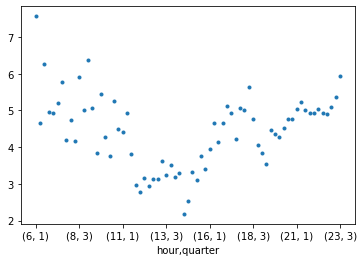

In [19]:
route30_seq1_21[4].iloc[:,2].plot(style = '.')

<AxesSubplot:xlabel='hour'>

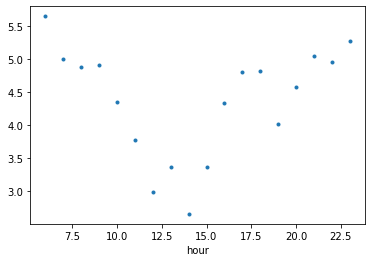

In [20]:
route30_seq1_21[2].iloc[:,2].plot(style = '.')

In [21]:
import datetime
today = datetime.date.today()
weekday = today.weekday()
start_delta = datetime.timedelta(days=weekday, weeks=1)

start_of_week = today - start_delta
week_dates = []

for day in range(7):
    week_dates.append((start_of_week + datetime.timedelta(days=day)).strftime("%Y-%m-%d"))



In [22]:
def transfer_speed_matrix_by_week(route_id,route_seq,week):

    today = datetime.date.today()
    weekday = today.weekday()
    start_delta = datetime.timedelta(days=weekday, weeks=week)

    start_of_week = today - start_delta
    last_week_dates = []

    for day in range(7):
        last_week_dates.append((start_of_week + datetime.timedelta(days=day)).strftime("%Y-%m-%d"))
      
    
    stops = get_stops_list (route_id,route_seq,start_of_week)
    
    speed_martix = {}

    for stop in stops[:-1]:
        week_speed={}
        for day in last_week_dates:
            week_speed[day] = get_travel_speed(route_id,route_seq,day)[2]['stop{}'.format(stop)]
        speed_martix['stop{}'.format(stop)] = week_speed.copy()
    
    # stop1_week_speed_df = pd.DataFrame(week_speed)

        
    return speed_martix
    
    # return stop1_week_speed_df,stop2_week_speed_df,stop3_week_speed_df,stop4_week_speed_df,stop5_week_speed_df,stop6_week_speed_df



In [48]:


import time


print(datetime.datetime.now())

start = time.time()

a = transfer_speed_matrix_by_week(2003472,1,1)
b = transfer_speed_matrix_by_week(2003472,1,2)
c = transfer_speed_matrix_by_week(2003472,1,3)
d = transfer_speed_matrix_by_week(2003472,1,4)

end = time.time()
print(end - start)

2022-10-03 18:19:57.002245


NoHostAvailable: ('Unable to connect to any servers', {'158.132.175.131:9042': OSError(None, "Tried connecting to [('158.132.175.131', 9042)]. Last error: timed out")})

In [ ]:
pd.DataFrame(a['stop1'])

In [ ]:
pd.DataFrame(a['stop1'])

In [ ]:
pd.DataFrame(b['stop2'])

In [ ]:
pd.DataFrame(c['stop1'])

In [ ]:
pd.DataFrame(d['stop1'])

In [ ]:

ax = pd.DataFrame(a['stop2']).iloc[:,0].plot()
pd.DataFrame(b['stop2']).iloc[:,0].plot(ax= ax)
pd.DataFrame(c['stop2']).iloc[:,0].plot(ax= ax)



<AxesSubplot:xlabel='hour'>

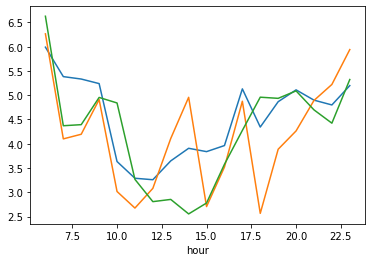

In [30]:
bx = pd.DataFrame(a['stop3']).iloc[:,1].plot()
pd.DataFrame(b['stop3']).iloc[:,1].plot(ax= bx)
pd.DataFrame(c['stop3']).iloc[:,1].plot(ax= bx)



<AxesSubplot:xlabel='hour'>

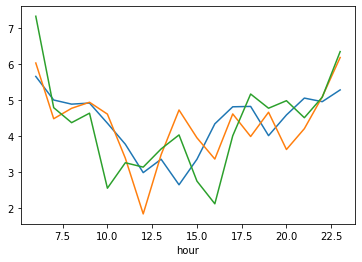

In [42]:
# cx = pd.DataFrame(a['stop3']).iloc[:,2].plot()
# pd.DataFrame(b['stop3']).iloc[:,2].plot(ax= cx)
# pd.DataFrame(c['stop3']).iloc[:,2].plot(ax= cx)

dx = pd.DataFrame(a['stop3']).iloc[:,2].plot()
pd.DataFrame(b['stop3']).iloc[:,2].plot(ax= dx)
pd.DataFrame(c['stop3']).iloc[:,2].plot(ax= dx)



<AxesSubplot:xlabel='hour'>

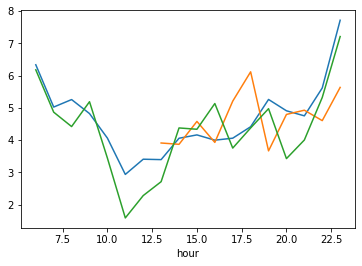

In [43]:
dx = pd.DataFrame(a['stop3']).iloc[:,3].plot()
pd.DataFrame(b['stop3']).iloc[:,3].plot(ax= dx)
pd.DataFrame(c['stop3']).iloc[:,3].plot(ax= dx)


<AxesSubplot:xlabel='hour'>

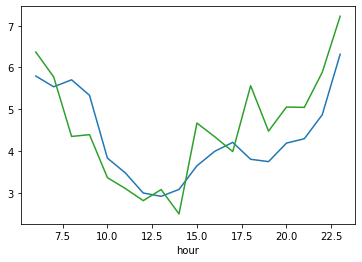

In [44]:

ex = pd.DataFrame(a['stop3']).iloc[:,4].plot()
pd.DataFrame(b['stop3']).iloc[:,4].plot(ax= ex)
pd.DataFrame(c['stop3']).iloc[:,4].plot(ax= ex)


<AxesSubplot:xlabel='hour'>

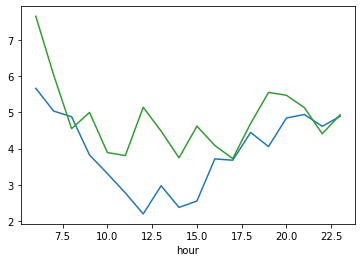

In [45]:

fx = pd.DataFrame(a['stop3']).iloc[:,5].plot()
pd.DataFrame(b['stop3']).iloc[:,5].plot(ax= fx)
pd.DataFrame(c['stop3']).iloc[:,5].plot(ax= fx)


<AxesSubplot:xlabel='hour'>

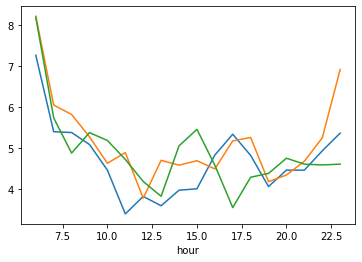

In [46]:

gx = pd.DataFrame(a['stop3']).iloc[:,6].plot()
pd.DataFrame(b['stop3']).iloc[:,6].plot(ax= gx)
pd.DataFrame(c['stop3']).iloc[:,6].plot(ax= gx)


In [36]:
ax = pd.DataFrame(a['stop3']).plot()
pd.DataFrame(b['stop3']).plot(ax= ax)
pd.DataFrame(c['stop3']).plot(ax= ax)

<AxesSubplot:xlabel='hour'>

In [37]:

fx = pd.DataFrame(a['stop2']).plot()
pd.DataFrame(b['stop2']).plot(ax= fx)
pd.DataFrame(c['stop2']).plot(ax= fx)


<AxesSubplot:xlabel='hour'>

In [627]:
whole2.tail(30)

date  hour      speed
474  26.0  12.0   7.950902
475  26.0  13.0   8.364475
476  26.0  14.0   5.247553
477  26.0  15.0   6.925005
478  26.0  16.0   5.828955
479  26.0  17.0   6.287080
480  26.0  18.0   8.053929
481  26.0  19.0   7.746633
482  26.0  20.0   9.935099
483  26.0  21.0   8.538294
484  26.0  22.0   7.613076
485  26.0  23.0   8.795907
486  27.0   6.0  11.001080
487  27.0   7.0   9.651138
488  27.0   8.0   9.005707
489  27.0   9.0   8.483243
490  27.0  10.0   9.889926
491  27.0  11.0   7.584777
492  27.0  12.0   8.425443
493  27.0  13.0   8.460471
494  27.0  14.0   8.346127
495  27.0  15.0   8.265797
496  27.0  16.0   7.621824
497  27.0  17.0   7.705751
498  27.0  18.0   8.595634
499  27.0  19.0   6.556636
500  27.0  20.0   9.395061
501  27.0  21.0   8.466885
502  27.0  22.0   8.102905
503  27.0  23.0   9.747325

<IPython.core.display.Javascript object>


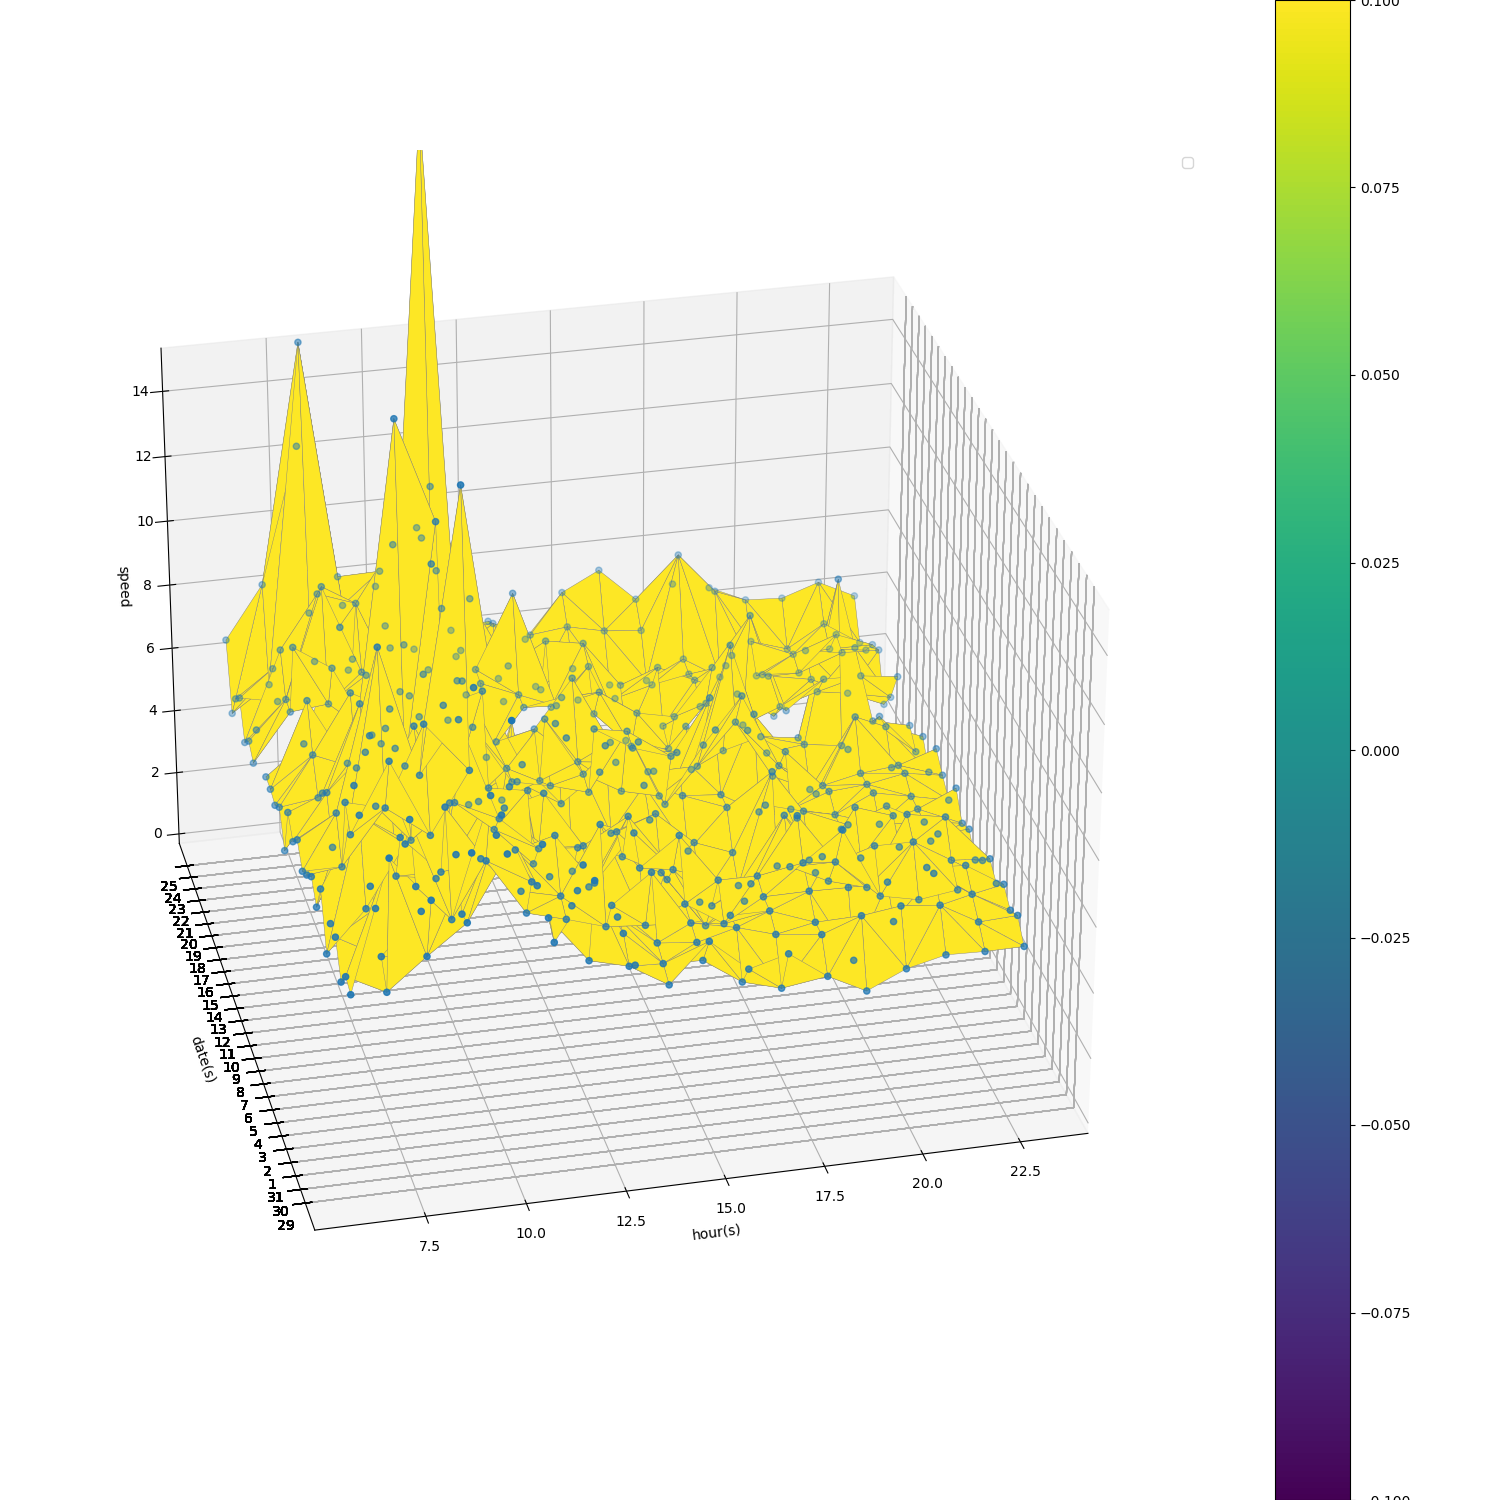

/var/folders/5s/98drq03s1vldwczvwsrz1hgr0000gn/T/ipykernel_31516/1987906461.py:29: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
No handles with labels found to put in legend.


In [708]:
%matplotlib notebook

whole = pd.DataFrame(d['stop2'])
whole = whole.join( pd.DataFrame(c['stop2']))
whole = whole.join( pd.DataFrame(b['stop2']))
whole = whole.join( pd.DataFrame(a['stop2']))

whole2 = pd.DataFrame([], columns = ['date','hour','speed'])
dates = []

for j in range(len(whole.columns)):
    for i in range(len(whole)):
        whole2 = whole2.append({'date': j,
                                'hour': whole.index[i],
                                'speed': whole.iloc[i,j]},ignore_index=True
                              )
        dates.append(whole.columns[j])

dates_formatted = [pd.to_datetime(d).date().day for d in dates ]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# whole2 = whole2[whole2['date'] == 2]
# whole2 = whole2[whole2['hour'] == 13]


fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
ax.set_xlabel('hour(s)')
ax.set_ylabel('date(s)')
ax.set_zlabel('speed')
ax.view_init(30,30)
ax.yaxis.set_ticks(y)
ax.yaxis.set_ticklabels(dates_formatted)

ax.set_zlim(0,15)
# whole2 = whole2.fillna(0)

x = whole2['hour']
y = whole2['date']
z = whole2['speed']

# ax.plot_surface(x,y,z)

ts = ax.plot_trisurf(x,y,z, cmap = "viridis",edgecolor = 'grey', linewidth = 0.3)

# bins = [0, 2.5, 5, 7.5, 10,12.5 ,15]

fig.colorbar(ts,ax=ax)

ax.scatter(x,y,z)
plt.legend()


In [629]:
 whole2

date  hour     speed
0     0.0   6.0       NaN
1     0.0   7.0       NaN
2     0.0   8.0       NaN
3     0.0   9.0       NaN
4     0.0  10.0       NaN
..    ...   ...       ...
499  27.0  19.0  6.556636
500  27.0  20.0  9.395061
501  27.0  21.0  8.466885
502  27.0  22.0  8.102905
503  27.0  23.0  9.747325

[504 rows x 3 columns]

date  hour     speed
0     0.0   6.0       NaN
1     0.0   7.0       NaN
2     0.0   8.0       NaN
3     0.0   9.0       NaN
4     0.0  10.0       NaN
..    ...   ...       ...
499  27.0  19.0  6.556636
500  27.0  20.0  9.395061
501  27.0  21.0  8.466885
502  27.0  22.0  8.102905
503  27.0  23.0  9.747325

[504 rows x 3 columns]

In [ ]:
## step1 : smooth the eta data by taking mean on each 00,15,30,45 sec's data (group by minutes)
## step2 : calcaute the time diffrence between stop n and stop n+1 in each minute
## step3 : reduce the negative time diffrence 
## step4 : create dataframe with eta time diffrence matrix group by hour
## step5 : create dataframe with time diffrence / road length between stop n and n+1 (est.speed ) (per day)
## step6 : create dataframe with est.speed with hours(row) and weeks(column) for each stop


## remark
## None value : Mean of the last hour and the next hour? / Mean of the last two hour


## problem 
## diffrence service time of diffrence route --> How to deal with NA value?



In [383]:
xxx = get_travel_speed(2006408,1,"2022-09-20")


stop1       stop2       stop3      stop4       stop5
hour                                                           
6     324.846318  622.728220   86.384349  38.118737   71.373712
7     237.865788  510.631924  119.429789  43.566723   81.760516
8     289.223035  336.701257  101.378394  71.004464  130.032954
9     317.125076  467.895236  101.809384  69.008833  121.334686
10    359.160276  522.178024  121.862215  81.462240  127.966160
11    261.703428  332.704358  127.466291  86.586664  110.013929
12    286.410141  488.626732  131.489922  88.960994   99.626956
13    285.894178  367.441492  131.808357  62.747687  115.173563
14    246.442067  620.190789  107.215843  64.559035  107.832072
15    305.914562  510.413675   99.852390  67.651155   72.547790
16    339.069351  821.846073   78.502583  58.408112  102.342817
17    300.051171  760.142019  117.551081  58.618250  100.303409
18    340.164238  683.730767  140.468910  69.681233  109.326191
19    304.227474  647.963845  113.724686  55.096479  118.105392
20    476.959943  773.914472  113.015624  54.495527  109.233918
21    351.614416  622.746166  102.007484  56.381524   96.432690
22    332.857088  696.953328   95.021440  48.371264   87.620921
23    350.988238  775.694851   94.924090  51.689972   85.958938

In [395]:
xxx[2]

stop1      stop2     stop3     stop4     stop5
hour                                                    
6      7.370339   5.352310  3.023637  4.202500  6.510614
7     10.065456   6.527275  2.187017  3.676981  5.683510
8      8.278136   9.899086  2.576436  2.256112  3.573607
9      7.549790   7.123464  2.565529  2.321355  3.829793
10     6.666182   6.382947  2.143363  1.966482  3.631325
11     9.148629  10.018008  2.049129  1.850100  4.223890
12     8.359437   6.821229  1.986425  1.800722  4.664267
13     8.374524   9.070927  1.981626  2.552986  4.034665
14     9.715174   5.374209  2.436160  2.481357  4.309355
15     7.826458   6.530066  2.615810  2.367942  6.405250
16     7.061174   4.055546  3.327214  2.742667  4.540492
17     7.979398   4.384753  2.221970  2.732835  4.632811
18     7.038446   4.874777  1.859450  2.298955  4.250461
19     7.869860   5.143859  2.296730  2.907518  3.934509
20     5.019767   4.306722  2.311140  2.939581  4.254051
21     6.809242   5.352156  2.560547  2.841250  4.818767
22     7.192960   4.782293  2.748800  3.311760  5.303376
23     6.821390   4.296838  2.751619  3.099131  5.405915

In [436]:
get_routeno_by_routeid(2003472,1,'2022-09-21')

'30'

In [27]:
import json 


def get_route_id_by_route_no():
    type_name = ["Normal Departure","Normal Route","Normal Departure"]
        
        
    with open('GMB_info_2022-08-28.json') as f:
        data = json.loads(f.read())
    
    
    
    
    route_no = []
    route_id = []
    get_route_id_by_route_no = {}
    for region in data:
        get_route_id_by_route_no["{}".format(region['Region'])]= {}
        for route in data[0]["routes"]:

            route_list = []
            for route_type in route["route_info"]:
                if route_type['description_en'] in type_name :
                    for direction in route_type["directions"]:
                        route_list.append({"route_id" : route_type['route_id'],
                                           "route_seq" : direction['route_seq']})
                    else:
                        pass
                    
            
            
            
            

            get_route_id_by_route_no["{}".format(region['Region'])]["{}".format(route["route_no"])] = route_list
    
    
    with open('get_route_id_by_route_no.json', 'w') as f:
        json.dump(get_route_id_by_route_no, f)
    

In [28]:
get_route_id_by_route_no()

In [29]:
with open("get_route_id_by_route_no.json") as f:
    data =json.loads(f.read())

data["HKI"]["56"]


[{'route_id': 2001129, 'route_seq': 1}, {'route_id': 2001129, 'route_seq': 2}]

In [30]:

def search_routeid_by_routeno(routes_no):
    with open("get_route_id_by_route_no.json") as f:
        data =json.loads(f.read())
    
    if type(routes_no) == list:
        list2 = []
        for route_no in routes_no:
            list2 += data["HKI"][route_no]
        return list2
    
    elif type(route_no) == str:
        return data["HKI"][routes_no]
        
    

In [119]:
search_routeid_by_routeno(['1','1A','2','3','3A','4A','5','30','56A'])

[{'route_id': 2006408, 'route_seq': 1},
 {'route_id': 2006408, 'route_seq': 2},
 {'route_id': 2006441, 'route_seq': 1},
 {'route_id': 2006474, 'route_seq': 1},
 {'route_id': 2006510, 'route_seq': 1},
 {'route_id': 2006510, 'route_seq': 2},
 {'route_id': 2006540, 'route_seq': 1},
 {'route_id': 2006540, 'route_seq': 2},
 {'route_id': 2004095, 'route_seq': 1},
 {'route_id': 2004095, 'route_seq': 2},
 {'route_id': 2004081, 'route_seq': 1},
 {'route_id': 2004081, 'route_seq': 2},
 {'route_id': 2003472, 'route_seq': 1},
 {'route_id': 2003472, 'route_seq': 2},
 {'route_id': 2001130, 'route_seq': 1},
 {'route_id': 2001130, 'route_seq': 2}]

In [146]:
import time


print(datetime.datetime.now())

start = time.time()

a = transfer_speed_matrix_by_week(2006408,1,1)
b = transfer_speed_matrix_by_week(2006408,1,2)
c = transfer_speed_matrix_by_week(2006408,1,3)
d = transfer_speed_matrix_by_week(2006408,1,4)

end = time.time()
print(end - start)

2022-10-03 16:15:45.675509


NoHostAvailable: ('Unable to connect to any servers', {'158.132.175.131:9042': OSError(None, "Tried connecting to [('158.132.175.131', 9042)]. Last error: timed out")})

In [ ]:
xxxxx= pd.read_excel("./geo_route_talbe/geo_route_3_1.xlsx")
xxxxx = xxxxx.groupby(['stop_range']).sum()['Shape_Length']*100000
xxxxx.sum()

In [145]:
# temp2 = transfer_speed_matrix_by_week(2006408,1,1)

NoHostAvailable: ('Unable to connect to any servers', {'158.132.175.131:9042': OSError(None, "Tried connecting to [('158.132.175.131', 9042)]. Last error: timed out")})

In [37]:
temp2 = transfer_speed_matrix_by_week(2004081,1,2)

NoHostAvailable: ('Unable to connect to any servers', {'158.132.175.131:9042': OSError(None, "Tried connecting to [('158.132.175.131', 9042)]. Last error: timed out")})

In [ ]:
temp2['stop2']

In [50]:
temp = get_travel_speed(2004081,1,'2022-09-12')

NoHostAvailable: ('Unable to connect to any servers', {'158.132.175.131:9042': OSError(None, "Tried connecting to [('158.132.175.131', 9042)]. Last error: timed out")})

In [ ]:
temp[4]